In [2]:
# https://machinelearningmastery.com/neural-network-models-for-combined-classification-and-regression/
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.5.0


In [3]:
dataset_path = keras.utils.get_file("abalone.data", "https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv")
dataset_path

196608/191872 [==============================] - 0s 0us/step


'/home/fred/.keras/datasets/abalone.data'

In [22]:
raw_dataset = pd.read_csv(dataset_path, header=None)
dataset = raw_dataset.copy()
dataset = dataset.values
dataset

array([['M', 0.455, 0.365, ..., 0.101, 0.15, 15],
       ['M', 0.35, 0.265, ..., 0.0485, 0.07, 7],
       ['F', 0.53, 0.42, ..., 0.1415, 0.21, 9],
       ...,
       ['M', 0.6, 0.475, ..., 0.2875, 0.308, 9],
       ['F', 0.625, 0.485, ..., 0.261, 0.296, 10],
       ['M', 0.71, 0.555, ..., 0.3765, 0.495, 12]], dtype=object)

In [32]:
# split into input (X) and output (y) variables
X = dataset[:,1:-1].astype('float')
y = dataset[:,-1].astype('float')

In [48]:
X.shape

(4177, 7)

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [50]:
model = keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=[X_train.shape[1]]),
    layers.Dense(1)
])

In [54]:
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])


In [55]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(
  X_train, y_train,
  epochs=10, validation_split = 0.2)

Epoch 1/100
94/94 [==============================] - 0s 933us/step - loss: 6.7729 - accuracy: 3.3256e-04 - val_loss: 7.4948 - val_accuracy: 0.0000e+00
Epoch 2/100
94/94 [==============================] - 0s 744us/step - loss: 6.6939 - accuracy: 3.3256e-04 - val_loss: 7.2184 - val_accuracy: 0.0000e+00
Epoch 3/100
94/94 [==============================] - 0s 715us/step - loss: 6.6807 - accuracy: 3.3256e-04 - val_loss: 7.3192 - val_accuracy: 0.0000e+00
Epoch 4/100
94/94 [==============================] - 0s 695us/step - loss: 6.6853 - accuracy: 3.3256e-04 - val_loss: 7.2672 - val_accuracy: 0.0000e+00
Epoch 5/100
94/94 [==============================] - 0s 705us/step - loss: 6.6737 - accuracy: 3.3256e-04 - val_loss: 7.1243 - val_accuracy: 0.0000e+00
Epoch 6/100
94/94 [==============================] - 0s 706us/step - loss: 6.6108 - accuracy: 3.3256e-04 - val_loss: 7.0983 - val_accuracy: 0.0000e+00
Epoch 7/100
94/94 [==============================] - 0s 711us/step - loss: 6.5707 - accuracy: 

Epoch 55/100
94/94 [==============================] - 0s 685us/step - loss: 4.9497 - accuracy: 3.3256e-04 - val_loss: 5.1741 - val_accuracy: 0.0000e+00
Epoch 56/100
94/94 [==============================] - 0s 686us/step - loss: 4.9157 - accuracy: 3.3256e-04 - val_loss: 5.3000 - val_accuracy: 0.0000e+00
Epoch 57/100
94/94 [==============================] - 0s 691us/step - loss: 4.9312 - accuracy: 3.3256e-04 - val_loss: 5.1411 - val_accuracy: 0.0000e+00
Epoch 58/100
94/94 [==============================] - 0s 704us/step - loss: 4.9180 - accuracy: 3.3256e-04 - val_loss: 5.1660 - val_accuracy: 0.0000e+00
Epoch 59/100
94/94 [==============================] - 0s 685us/step - loss: 4.9138 - accuracy: 3.3256e-04 - val_loss: 5.1515 - val_accuracy: 0.0000e+00
Epoch 60/100
94/94 [==============================] - 0s 692us/step - loss: 4.8884 - accuracy: 3.3256e-04 - val_loss: 5.1219 - val_accuracy: 0.0000e+00
Epoch 61/100
94/94 [==============================] - 0s 675us/step - loss: 4.8870 - acc

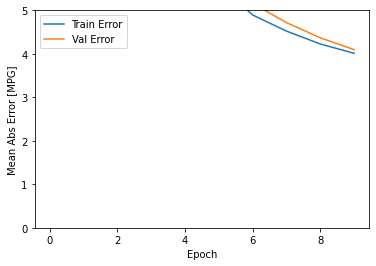

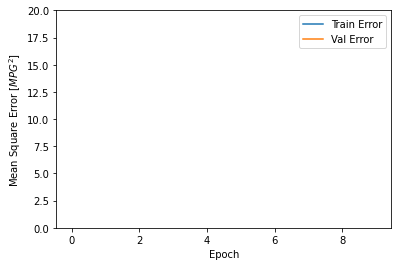

In [41]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)


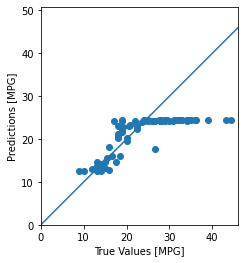

In [42]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
